In [1]:
import matplotlib.pyplot as plt
import pylab
import os 
import shutil
import pandas as pd 
import numpy as np 
from helpers import *

In [2]:
samples_df = load_queries()
listings_df = load_kb()
set_paper_style()

In [22]:
city_iata = pd.read_csv(f"../../data/conv-trs/city_iata_codes.csv")
city_iata

,city,IATA
0,Aalborg,AAL
1,Adana,ADA
2,Adıyaman,ADF
3,Amsterdam,AMS
4,Ancona,AOI
...,...,...
217,Örebro,ORB
218,İzmir,ADB
219,Łódź,LCJ
220,Şanlıurfa,SFQ


In [6]:
color_palette = sns.color_palette()

In [7]:
palette = {
    'High': color_palette[0], 
    'Medium': color_palette[1], 
    'Low': color_palette[2]
}

/var/folders/gk/1_hpxk0x6bvfh9xs2r_splw40000gn/T/ipykernel_86421/525599853.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/gk/1_hpxk0x6bvfh9xs2r_splw40000gn/T/ipykernel_86421/525599853.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figlegend.show()


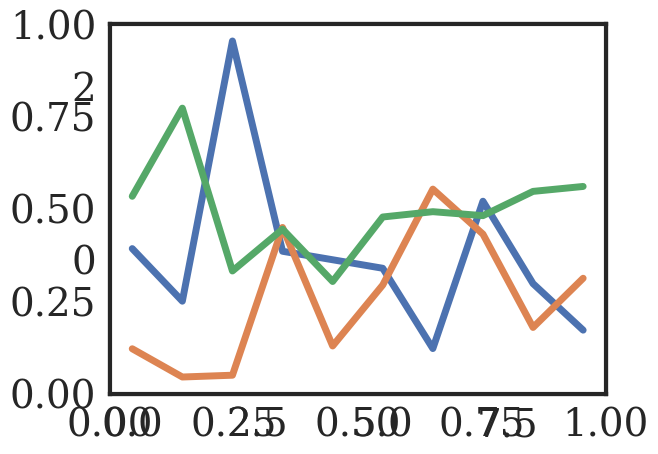

<Figure size 800x800 with 0 Axes>

In [8]:
set_paper_style()
fig = plt.figure()
ax = fig.add_subplot(111)

figlegend = pylab.figure(figsize=(8,8))
ax = fig.add_subplot(111)
x = range(10)
y1 = np.random.randn(10)
y2 = np.random.randn(10)
y3 = np.random.randn(10)

# Plot using the palette
line1, = ax.plot(x, y1, color=palette['High'], label='High')
line2, = ax.plot(x, y2, color=palette['Medium'], label='Medium')
line3, = ax.plot(x, y3, color=palette['Low'], label='Low')
legend = figlegend.legend(handles=[line1, line2, line3], labels=['High', 'Medium', 'Low'], loc='center', title="Popularity")
legend.get_texts()[0].set_color(palette['High'])   # Set first label to red
legend.get_texts()[1].set_color(palette['Medium']) 
legend.get_texts()[2].set_color(palette['Low'])
fig.show()
figlegend.show()
file_name = '../../plots/pdf/legend_citydist.png'
plt.tight_layout()
figlegend.savefig(file_name)
# shutil.copy(file_name, '/plots/')

In [9]:
def get_city_counts(cities, listings_df=listings_df):
    city_counts = Counter(city for city_list in cities for city in city_list)

    # Convert to DataFrame (optional)
    city_counts_df = pd.DataFrame.from_dict(city_counts, orient='index', columns=['count']).reset_index()
    city_counts_df.columns = ['city', 'count']

    city_counts_df = city_counts_df.merge(listings_df[["city", "popularity"]])
    popularity_order = ['Low', 'Medium', 'High']

    # Convert to ordered categorical
    city_counts_df['popularity'] = pd.Categorical(
    city_counts_df['popularity'],
    categories=popularity_order,
    ordered=True)

    new_df = pd.merge(left=city_counts_df, right=city_iata, how='left')

    return new_df

In [30]:
random_cities = city_iata.sample(n= 50)["city"].tolist()
random_cities

['Krasnodar',
 'Zürich',
 'Miskolc',
 'Berlin',
 'Cluj-Napoca',
 'Aalborg',
 'Gaziantep',
 'Geneva',
 'Lille',
 'Kharkiv',
 'Magdeburg',
 'London',
 'Diyarbakır',
 'London',
 'Zagreb',
 'Pristina',
 'Maastricht',
 'Podgorica',
 'Malatya',
 'Sivas',
 'Simferopol',
 'Varna',
 'Košice',
 'Adana',
 'London',
 'Erzurum',
 'Helsinki',
 'Murmansk',
 'Brussels',
 'Amsterdam',
 'Saarbrücken',
 'Coimbra',
 'Dijon',
 'Jönköping',
 'Düsseldorf',
 'Skopje',
 'Kraków',
 'Sofia',
 'Ankara',
 'Iaşi',
 'Belgrade',
 'Valencia',
 'Kazan',
 'Murcia',
 'Madrid',
 'Valladolid',
 'Turku',
 'Paris',
 'Nantes',
 'Niš']

In [64]:

sasi = pd.read_json(f"{data_dir}/multi-agent/results/Gemini2Point5Flash_sasi_results.json")
offer_df = pd.DataFrame(get_offer(samples_df, method="prompt_ranking_aggressive", model="gemini2point5flash"))
df_sasi = get_city_counts(sasi["response_Gemini2Point5Flash"].dropna())
df_mami = get_city_counts(offer_df["final_offer"])
df_masi = get_city_counts(offer_df["first_offer"])

c_p_143_pop_high_hard
c_p_15_pop_high_hard
c_p_5_pop_high_hard
c_p_155_pop_high_hard
c_p_116_pop_high_hard
c_p_162_pop_high_medium
c_p_113_pop_high_medium
c_p_130_pop_high_medium
c_p_131_pop_high_medium
c_p_94_pop_high_medium
c_p_67_pop_high_sustainable
c_p_0_pop_high_sustainable
c_p_43_pop_high_sustainable
c_p_68_pop_high_sustainable
c_p_38_pop_high_sustainable
c_p_118_pop_low_medium
c_p_24_pop_low_medium
c_p_119_pop_low_medium
c_p_60_pop_low_medium
c_p_77_pop_low_medium
c_p_113_pop_low_sustainable
c_p_147_pop_low_sustainable
c_p_3_pop_low_sustainable
c_p_169_pop_low_sustainable
c_p_54_pop_low_sustainable
c_p_136_pop_medium_hard
c_p_92_pop_medium_hard
c_p_196_pop_medium_hard
c_p_36_pop_medium_hard
c_p_167_pop_medium_hard
c_p_160_pop_medium_medium
c_p_98_pop_medium_medium
c_p_133_pop_medium_medium
c_p_80_pop_medium_medium
c_p_78_pop_medium_medium
c_p_120_pop_medium_sustainable
c_p_47_pop_medium_sustainable
c_p_14_pop_medium_sustainable
c_p_28_pop_medium_sustainable
c_p_150_pop_medium_s

In [152]:
def plot_city_histogram(df, method):
    sns.set_context("paper", rc={"font.size":28,"axes.titlesize":28,"axes.labelsize":28})   
    # fig, axes = plt.subplots(figsize=(22, 12))
    fig, axes = plt.subplots(figsize=(16, 10))

    sns.barplot(
        data=df.sort_values(["count"], ascending=False),
        x='IATA',
        y='count',
        hue='popularity',
        hue_order=['High', 'Medium', 'Low'],
        palette=color_palette,
        ax=axes  # Important: plot on the specific axes
    )

    # axes.set_title(f'{method}')
    axes.set_xlabel('City',fontsize=36, fontweight='bold')
    axes.set_ylabel('Occurrences', fontsize=36, fontweight='bold')
    axes.tick_params(axis='x', rotation=45, labelsize=22)
    axes.tick_params(axis='y', labelsize=36)

    # Remove the legend
    if method != "MASI":
        axes.legend_.remove()
    else:
        legend = axes.get_legend()
        legend.set_title("Popularity Levels", prop={'size': 30, 'weight': 'bold'})
        # legend.set_bbox_to_anchor((1, 1))
        legend.set_loc('best')
        for text in legend.get_texts():
            text.set_fontsize(28)
            # text.set_fontweight('bold')
        for line in legend.get_lines():
            line.set_linewidth(5.0)
        # for handle in legend.legend_handles:
        #     handle.set_linewidth(3)  # line width
            # For scatter markers (like in sns.scatterplot), use set_sizes or set_markerfacecolor etc.


    plt.tight_layout()
    file_name = f'citydist_{method}'
    os.makedirs(f'../../plots/pdf/city_dist/',exist_ok=True)
    os.makedirs(f'../../plots/png/city_dist/',exist_ok=True)
    save_plots(file_name=file_name, subfolder="city_dist",
               extensions=["pdf", "png"],
               copy_to_paper=True,
               paper_location=os.getenv("PAPER_LOCATION"))

    plt.show()


In [153]:
legend.legend_handles

/var/folders/gk/1_hpxk0x6bvfh9xs2r_splw40000gn/T/ipykernel_86421/2556966703.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(


new file name:  citydist_MASI.pdf
/Users/ashmi/Code/Scripts/phd/travel-crs/tests/multi_ctrs/../../plots/pdf/city_dist/citydist_MASI.pdf
copying to paper location:  /Users/ashmi/Documents/My Projects/RQ3/cikm-25-paper
new file name:  citydist_MASI.png
/Users/ashmi/Code/Scripts/phd/travel-crs/tests/multi_ctrs/../../plots/png/city_dist/citydist_MASI.png
copying to paper location:  /Users/ashmi/Documents/My Projects/RQ3/cikm-25-paper


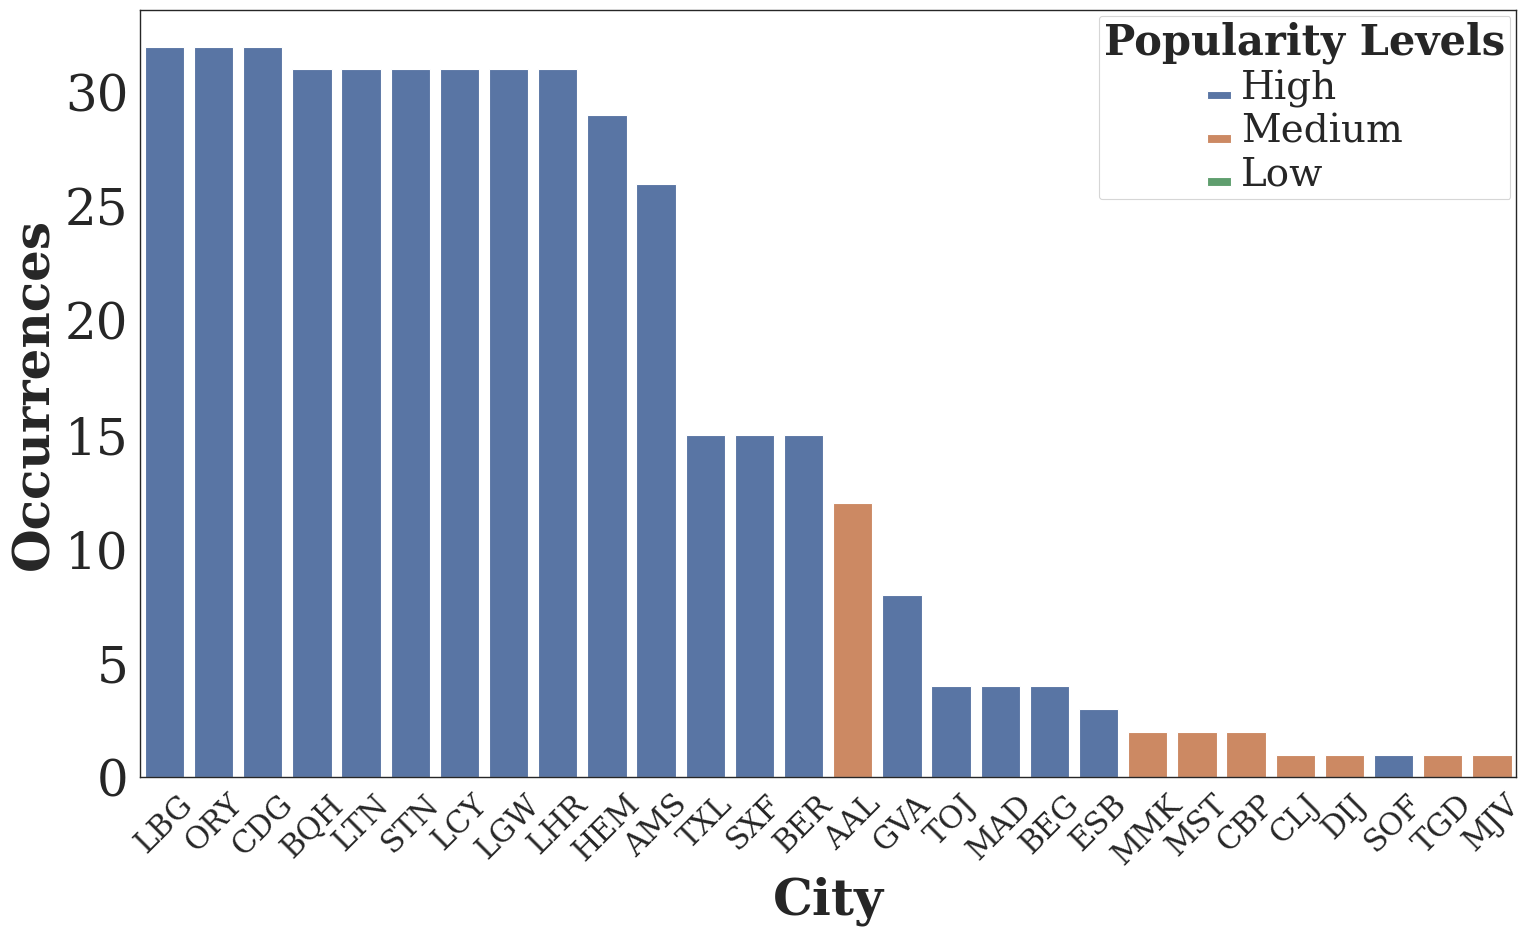

In [154]:
# plot_city_histogram(df_sasi.loc[df_sasi["city"].isin(random_cities)], 'SASI')
plot_city_histogram(df_masi.loc[df_masi["city"].isin(random_cities)], 'MASI')
# plot_city_histogram(df_mami.loc[df_mami["city"].isin(random_cities)], 'MAMI')

In [27]:
df_masi.head()

,city,count,popularity,IATA
0,London,31,High,LGW
1,London,31,High,LTN
2,London,31,High,LHR
3,London,31,High,STN
4,London,31,High,BQH
